In [1]:
import itertools
import sys, os

import numpy as np
import pandas as pd
from scipy.special import comb
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

from collections import Counter
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sns.set(rc={'figure.figsize':(15,8)})
sns.set_context('poster')

In [2]:
%load_ext autoreload
%autoreload 2
#import CCPA_lib as cp
import sorf_lib as sf

In [3]:
sns.set_context('talk')
sns.set_style('white')


![](http://oregonstate.edu/instruct/bb450/fall14/stryer7/2/table_02_02.jpg)

https://www.uniprot.org/uniprot/Q7V735

http://tigrfams.jcvi.org/cgi-bin/HmmReportPage.cgi?acc=TIGR03798

https://www.ebi.ac.uk/training/online/course/interpro-functional-and-structural-analysis-protei/sequence-searching/searching-interpro-batc

http://www.ebi.ac.uk/interpro/sequencesearch/iprscan5-S20190707-131508-0462-76111813-p1m

https://www.ebi.ac.uk/Tools/services/rest/iprscan5/result/iprscan5-S20190707-131508-0462-76111813-p1m/json

In [4]:
oorder = ['Intergenic', 'Antisense', 'Out of Frame','In Frame',  'Annotated', ]
opalette = sns.color_palette("rainbow", 5).as_hex()
#del opalette[4]

In [5]:
dpath = 'orffinder_tmp'
summary_suffix = '.sorf.summary.csv.gz'
sorf_result_suffix = '.sorf.feather.gz'

In [6]:
ccrg_excel_fname =  'ccrg and procm genes.xlsx'

In [7]:
protein_fname = r'Seq46351_QE2_specific-new-one peptide.xlsx'
protein_dpath = os.path.join('1A3','proteomics', 'with orfs DB')
protein_fpath = os.path.join(protein_dpath, protein_fname)

In [8]:
genome = 'MIT9313'

In [9]:
genome_df = pd.read_feather(os.path.join('data', f'{genome}.ncbi.gb.feather.gz'))


C:\Users\wosnat\Anaconda3\lib\site-packages\pyarrow\pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


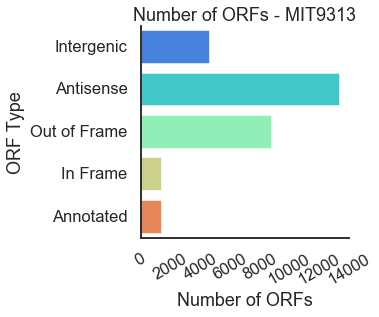

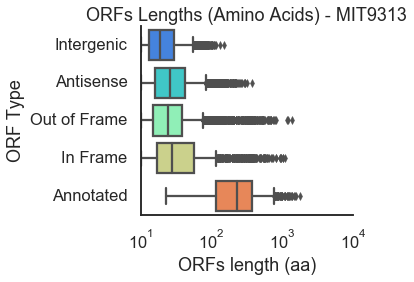

In [10]:
omap = {'standalone' : 'Intergenic', 
        'out_frame' : 'Out of Frame', 
        'antisense' : 'Antisense', 
        'in_frame' :'In Frame', 
        'known' : 'Annotated'}

genome = 'MIT9313'
df = pd.read_feather(os.path.join('orffinder_tmp', f'{genome}.ncbi.sorf.feather.gz'))
df = df.loc[df.otype != 'overlap']
df.otype = df.otype.map(omap)
    
sns.catplot(data=df, y='otype', kind='count', aspect=1.4, height=4,
       order=oorder, palette=opalette
           )
plt.xticks(rotation=30) 
plt.ylabel('ORF Type')
plt.xlabel('Number of ORFs')
plt.title(f'Number of ORFs - {genome}')

sns.catplot(data=df, y='otype', x='len_aa', aspect=1.4, height=4,
        kind='box',
       order=oorder, palette=opalette
           )
plt.xscale('log')
plt.ylabel('ORF Type')
plt.xlabel('ORFs length (aa)')

plt.title(f'ORFs Lengths (Amino Acids) - {genome}')
plt.show()
    

In [11]:
genome_df.head()

,contig_id,gene_id,pmt_id,type,location,strand,start,stop,left,right,function,genome,old_locus_tag,product,db_xref,protein_id,figfam,nucleotide_sequence,aa_sequence
0,MIT9313,AKG35_RS00005,PMT0001,CDS,AKG35_RS00005,+,173,1340,173,1340,DNA polymerase III subunit beta,MIT9313,"PMT0001,RG24_RS00005",DNA polymerase III subunit beta,GI:499441916,WP_011129380.1,,,MKLVCSQAELNTALQLVSRAVASRPTHPVLANVLLTADAGTDRLSL...
1,MIT9313,AKG35_RS00010,PMT0002,CDS,AKG35_RS00010,+,1343,2120,1343,2120,hypothetical protein,MIT9313,"PMT0002,RG24_RS00010",hypothetical protein,GI:752737102,WP_041384224.1,,,MNLPDQILLSDLLHHRVRCDQGLDHGPGVLPWMHPPVHRLLGWVSR...
2,MIT9313,AKG35_RS00015,PMT0003,CDS,AKG35_RS00015,+,2177,4562,2177,4562,phosphoribosylformylglycinamidine synthase sub...,MIT9313,"PMT0003,RG24_RS00015",phosphoribosylformylglycinamidine synthase sub...,GI:499441918,WP_011129382.1,,,MRVDYDVAAALRHEGLKPHDYDEICRRLQRAPNRVELGMFGVMWSE...
3,MIT9313,AKG35_RS00020,PMT0004,CDS,AKG35_RS00020,+,4621,6079,4621,6079,amidophosphoribosyltransferase,MIT9313,"PMT0004,RG24_RS00020",amidophosphoribosyltransferase,GI:499441919,WP_011129383.1,,,MCGIVGIVSTALVNQQIYDSLLLLQHRGQDSTGIATMDGSVFHLHK...
4,MIT9313,AKG35_RS00025,PMT0005,CDS,AKG35_RS00025,-,6114,8604,6114,8604,DNA topoisomerase 4 subunit A,MIT9313,"PMT0005,RG24_RS00025",DNA topoisomerase 4 subunit A,GI:499441920,WP_011129384.1,,,MAEERLQPIALHQEMQRSYLEYAMSVIVGRALPDARDGLKPVQRRI...


In [12]:
df.loc[:,'merge_location'] = df['location']
df.loc[df['location'].isna(), 'merge_location'] = df.loc[df['location'].isna(), 'overlap_location']
df1 = pd.merge(df, genome_df, how='left', left_on='merge_location', right_on='location', suffixes=['', '_overlap'])

In [13]:
df1.loc[df1.otype == 'Annotated'].head().T

,27,34,40,57,70
orfid,ORF29_BX548175.1:12111:12746,ORF36_BX548175.1:15696:17108,ORF42_BX548175.1:18915:19421,ORF59_BX548175.1:26835:27080,ORF74_BX548175.1:34704:35198
contig,BX548175.1,BX548175.1,BX548175.1,BX548175.1,BX548175.1
left,12111,15696,18915,26835,34704
right,12746,17108,19421,27080,35198
start,12111,15696,18915,26835,34704
stop,12746,17108,19421,27080,35198
strand,+,+,+,+,+
aaseq,MQSRSLARELALLVLGQIPERESSRLKTISLESLLQKAFDTLSQHW...,MAGGVTSGSAEGWSKRFEEGLHPVIERFNASISFDITLLQEDLDGS...,MPITALLLSRRSLLIATIAGAFGVYRRPAAAFAATRAEDLDWSLSN...,MTAQLVPDQQIDLRGTPCPINFIRCRLALEGLKDKERLQVDLDRGE...,MAMQLDHDQLHQLLAALAESDIQEFRLEGDDFRLEVRRNIPAPAVV...
len_nn,636,1413,507,246,495
len_aa,211,470,168,81,164


In [14]:
df.head()

,orfid,contig,left,right,start,stop,strand,aaseq,len_nn,len_aa,...,overlap_gene_type,overlap_count,is_same_strand,is_out_of_frame,is_inside,is_upstream,is_downstream,overlap_type,otype,merge_location
0,ORF1_BX548175.1:78:176,BX548175.1,78,176,78,176,+,MNENDLPLHFLLACEILGDLFSVLVLVVTLIQ,99,32,...,CDS,1,1.0,1.0,0.0,1.0,0.0,upstream_out_frame,Out of Frame,AKG35_RS00005
1,ORF2_BX548175.1:453:590,BX548175.1,453,590,453,590,+,MRLVNRLNSKVQAGVIRCVGCLLMIFLNYLLLKVVRLSRLMRGLF,138,45,...,CDS,1,1.0,1.0,1.0,0.0,0.0,internal_out_frame,Out of Frame,AKG35_RS00005
2,ORF3_BX548175.1:669:722,BX548175.1,669,722,669,722,+,MVKPWKQRQLMVTALPF,54,17,...,CDS,1,1.0,1.0,1.0,0.0,0.0,internal_out_frame,Out of Frame,AKG35_RS00005
3,ORF4_BX548175.1:972:1025,BX548175.1,972,1025,972,1025,+,MVLLGVSMLIGVLLLQL,54,17,...,CDS,1,1.0,1.0,1.0,0.0,0.0,internal_out_frame,Out of Frame,AKG35_RS00005
4,ORF5_BX548175.1:1167:1205,BX548175.1,1167,1205,1167,1205,+,MLFRLLLMFVMY,39,12,...,CDS,1,1.0,1.0,1.0,0.0,0.0,internal_out_frame,Out of Frame,AKG35_RS00005


In [15]:
df.columns

Index(['orfid', 'contig', 'left', 'right', 'start', 'stop', 'strand', 'aaseq',
       'len_nn', 'len_aa', 'len_aa3', 'rast_left', 'rast_right', 'contig_id',
       'gene_id', 'location', 'type', 'start_r', 'stop_r', 'function',
       'figfam', 'nucleotide_sequence', 'aa_sequence', 'genome', 'left_r',
       'right_r', 'overlap_location', 'overlap_strand', 'overlap_gene_type',
       'overlap_count', 'is_same_strand', 'is_out_of_frame', 'is_inside',
       'is_upstream', 'is_downstream', 'overlap_type', 'otype',
       'merge_location'],
      dtype='object')

In [16]:
genome_df.columns

Index(['contig_id', 'gene_id', 'pmt_id', 'type', 'location', 'strand', 'start',
       'stop', 'left', 'right', 'function', 'genome', 'old_locus_tag',
       'product', 'db_xref', 'protein_id', 'figfam', 'nucleotide_sequence',
       'aa_sequence'],
      dtype='object')

In [17]:
df.otype.value_counts()

Antisense       13413
Out of Frame     8841
Intergenic       4667
Annotated        1472
In Frame         1443
Name: otype, dtype: int64

In [18]:
annotated_orfs = df.loc[df.otype.isin(['Annotated']), 'gene_id']

In [19]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

#simple_seq = Seq("GATC")
#simple_seq_r = SeqRecord(simple_seq)

In [29]:
def row2record(row):
    #print(row)
    s = Seq(row.aa_sequence)
    record = SeqRecord(s, id=row.gene_id, description=row.function) 
    return record
genome_recs = [row2record(row)
               for i, row in genome_df.loc[
                   ~genome_df.gene_id.isin(annotated_orfs) & genome_df.type.isin(['CDS']), 
                   ['gene_id', 'aa_sequence', 'function']
               ].iterrows() ]


In [21]:
df.otype.value_counts()


Antisense       13413
Out of Frame     8841
Intergenic       4667
Annotated        1472
In Frame         1443
Name: otype, dtype: int64

In [22]:
df.loc[~df.otype.isin(['In Frame'])].otype.value_counts()

Antisense       13413
Out of Frame     8841
Intergenic       4667
Annotated        1472
Name: otype, dtype: int64

In [23]:
def is_in_orf_id(r):
    orfid = r.id.replace('lcl|','')
    # ignore in frame - will just cause noise
    return df.loc[~df.otype.isin(['In Frame']), 'orfid'].isin([orfid]).sum() > 0
accession = sf.get_accession(genome)
orf_dpath = 'orffinder_tmp'
orf_fpath = os.path.join(orf_dpath, f'{accession}.orffinder.fa')


In [24]:
from Bio import SeqIO
records = [r for r in SeqIO.parse(orf_fpath, "fasta") if is_in_orf_id(r)]

In [30]:
len(records), len(genome_recs), len(records + genome_recs)

(28393, 914, 29307)

In [31]:
out_fpath = os.path.join(orf_dpath, f'{genome}_orfs_db.fasta')
count = SeqIO.write(records + genome_recs, out_fpath, "fasta")
print("Saved %i records from %s to %s" % (count, orf_fpath, out_fpath))

Saved 29307 records from orffinder_tmp\BX548175.orffinder.fa to orffinder_tmp\MIT9313_orfs_db.fasta
